ADF Statistic: -3.140151
p-value: 0.023721
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.943
Date:                Tue, 04 Mar 2025   Prob (F-statistic):            0.00281
Time:                        05:57:39   Log-Likelihood:                -20435.
No. Observations:                2805   AIC:                         4.087e+04
Df Residuals:                    2803   BIC:                         4.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

-2.9904224691008015

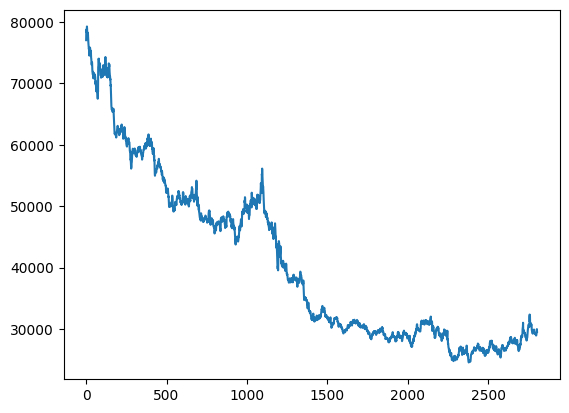

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

file_path = "/content/Gold_Price_DataSet (1).csv"

df = pd.read_csv(file_path)

plt.plot(df["Price"])

X = df["Price"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

df["Diff_Value"] = df["Price"].diff()

diff_values = df["Diff_Value"].values
Y = diff_values[~np.isnan(diff_values)]


ts_values_orig = df["Price"].values
ts_values = ts_values_orig[:-1]


X = sm.add_constant(ts_values)

model = sm.OLS(Y,X)
results = model.fit()

print(results.summary())

results.tvalues[1]